In [1]:
# imports

from datasets import load_dataset, Dataset, DatasetDict
from nltk.corpus import stopwords
import pandas as pd
import seaborn as sns
import string
import os
import re

In [2]:
# Creating a directory to save data as csv 

current_dir = os.getcwd()
main_dir = os.path.abspath(os.path.join(current_dir, '..'))
data_dir = os.path.abspath(os.path.join(main_dir, 'data'))
os.makedirs(data_dir, exist_ok=True)

In [3]:
from datasets import load_dataset

In [4]:
ds = load_dataset('imdb')

In [5]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [6]:
data = pd.DataFrame(ds['train'])
tester = pd.DataFrame(ds['test'])

data.to_csv(os.path.join(data_dir, 'unprocessed_Data.csv'), index=False)

In [7]:
data.head()

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


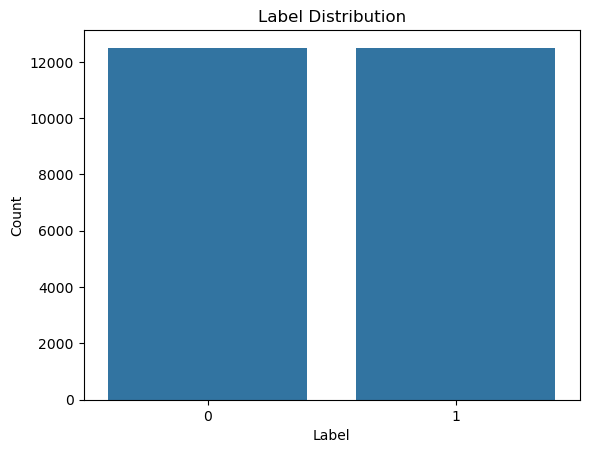

In [8]:
#adding visualization
import seaborn as sns
import matplotlib.pyplot as plt

label_counts = data['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']

sns.barplot(x='label', y='count', data=label_counts)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


The dataset is balanced, with an equal representation of positive and negative labels—indicating no class imbalance.

In [9]:
# Remove all tags
def clean_br_tags(text):

    cleaned_text = re.sub(r"(?:<br\s*/?>)+", " ", text, flags=re.IGNORECASE)
    return cleaned_text.strip()
data['preprocessed_text'] = data['text'].apply(clean_br_tags)
tester['preprocessed_text'] = tester['text'].apply(clean_br_tags)

In [10]:
# Removing punctuation
def remove_punctuation(text):
    trans_dict = {p: ' ' for p in string.punctuation if p != "'"}
    trans_dict["'"] = None
    tab = str.maketrans(trans_dict) 
    text = text.translate(tab)
    return text
data['preprocessed_text'] = data['preprocessed_text'].apply(lambda x: remove_punctuation(x))
tester['preprocessed_text'] = tester['preprocessed_text'].apply(lambda x: remove_punctuation(x))

In [11]:
# Convert all text to lowercase for both train and test sets
# This helps normalize the text by reducing case sensitivity issues during text analysis or modeling

data['preprocessed_text'] = data['preprocessed_text'].apply(lambda x: x.lower())
tester['preprocessed_text'] = tester['preprocessed_text'].apply(lambda x: x.lower())

In [12]:
# Checking final preprocessed data 

data

,text,label,preprocessed_text
0,I rented I AM CURIOUS-YELLOW from my video sto...,0,i rented i am curious yellow from my video sto...
1,"""I Am Curious: Yellow"" is a risible and preten...",0,i am curious yellow is a risible and preten...
2,If only to avoid making this type of film in t...,0,if only to avoid making this type of film in t...
3,This film was probably inspired by Godard's Ma...,0,this film was probably inspired by godards mas...
4,"Oh, brother...after hearing about this ridicul...",0,oh brother after hearing about this ridicul...
...,...,...,...
24995,A hit at the time but now better categorised a...,1,a hit at the time but now better categorised a...
24996,I love this movie like no other. Another time ...,1,i love this movie like no other another time ...
24997,This film and it's sequel Barry Mckenzie holds...,1,this film and its sequel barry mckenzie holds ...
24998,'The Adventures Of Barry McKenzie' started lif...,1,the adventures of barry mckenzie started life ...


In [13]:
data = data.sample(n=1000)

In [14]:
# Saving preprocessed data

data.to_csv(os.path.join(data_dir, 'preprocessed_data.csv'), index=False)
tester.to_csv(os.path.join(data_dir, 'data_tester.csv'), index=False)